In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
logger_data = pd.read_csv('../ML-for-Good-Hackathon/Data/CrisisLogger/crisislogger.csv')

In [4]:
logger_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   upload_id       140 non-null    int64 
 1   transcriptions  140 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [17]:
logger_data['transcriptions'][0]

"so high our experience so far has been a little bit difficult when you have a teenage child that is stuck in the house for five to six weeks so far I mean homeschooling you know but her friends has been very hard to see them when you see them on FaceTime working from home is difficult or so after what I was wearing on you I wouldn't mind working from home maybe twice a week every day for six days at 6 weeks if that's difficult communicating it's it's just it's a very hard thing but I think it's been harder on my teenage daughter more she's more seems more secluded now and not as happy and I have to go outside and walk the dog occasionally so she can get fresh air and feel like she's able to do something I encouraged her to work but everyone needs some physical contact just to be around people I mean it's just nature but will hopefully get well soon and hopefully everything will be back to normal again hopefully everyone can stay healthy and safe"

In [18]:
logger_data['transcriptions'][23]

"I am worried about the school kids not going outside at all. It's been 2 months now without school and many studemts here in New York City and suburbs have not been out once in 2 months. That to me is extreme. Many of them cramped up in small apartments. What are the emotional, physical and spiritual effects of such lack of outdoor activities and socializing. Was it even worth it to close the schools? Some countries never did. What damage has been done?"

In [19]:
logger_data['transcriptions'][54]

"Schools are still closed. This has been way too long for children to be home. Nowhere in media is it talked about how this prolonged absence from being in school affect students' well being. It almost feels like a surreal experiment. I am not so worried about lesrning. More so about social skills, fidgeting combined with ability to focus, and physical health. Some learning like basic skills and reading comprehension can be taught effectively remotely."

## Using workcloud technique to find important words

In [10]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [11]:
transcript_text = " | ".join(logger_data["transcriptions"].str.lower())

In [35]:
stop_words = list(STOPWORDS) + ["|", "time", "go", "will", "know"]


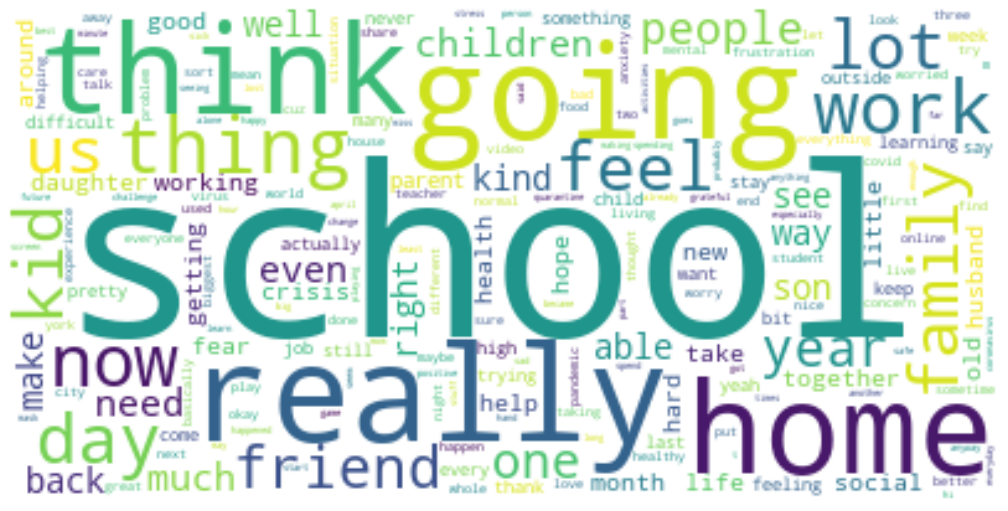

In [36]:
logger_wordcloud = WordCloud(collocations = False, background_color = 'white', stopwords=stop_words).generate(transcript_text)
# Display the generated Word Cloud
plt.figure(figsize=(16, 10), dpi=80)
plt.imshow(logger_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

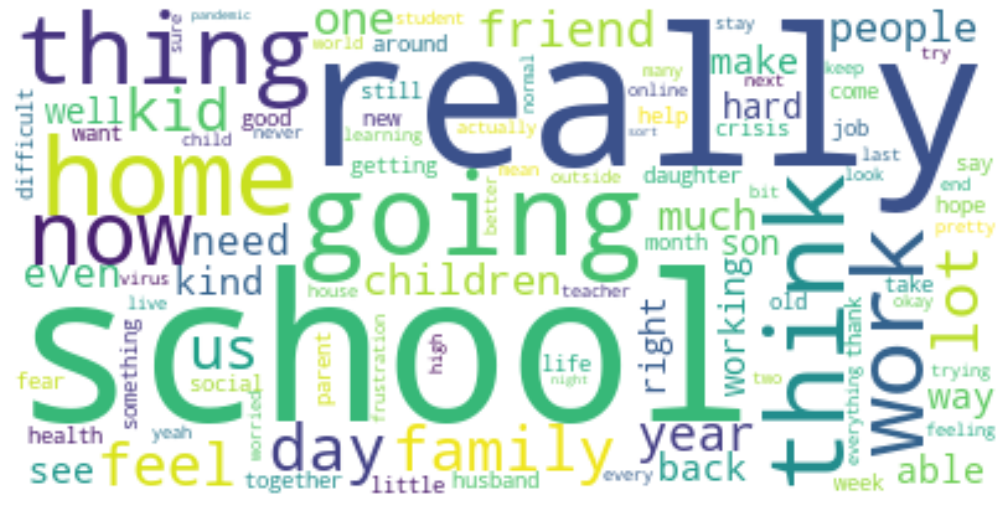

In [37]:
# Keeping 100 words only
logger_wordcloud_cl = WordCloud(collocations = False, max_words=100, background_color = 'white', stopwords=stop_words).generate(transcript_text)
# Display the generated Word Cloud
plt.figure(figsize=(16, 10), dpi=80)
plt.imshow(logger_wordcloud_cl, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word clound using tfidf vectorizer

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [39]:
# Finding vectors using tfidf
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
vecs = vectorizer.fit_transform(logger_data["transcriptions"])
vecs

<140x100 sparse matrix of type '<class 'numpy.float64'>'
	with 3027 stored elements in Compressed Sparse Row format>

In [40]:
# Checking feature names
feature_names = vectorizer.get_feature_names()
feature_names

['able',
 'actually',
 'anxiety',
 'away',
 'better',
 'bit',
 'care',
 'child',
 'children',
 'city',
 'come',
 'covid',
 'crisis',
 'cuz',
 'daughter',
 'day',
 'days',
 'different',
 'difficult',
 'does',
 'doesn',
 'doing',
 'don',
 'end',
 'family',
 'fear',
 'fears',
 'feel',
 'friends',
 'getting',
 'going',
 'good',
 'hard',
 'having',
 'health',
 'healthy',
 'help',
 'high',
 'home',
 'hope',
 'house',
 'husband',
 'job',
 'just',
 'kids',
 'kind',
 'know',
 'learning',
 'let',
 'life',
 'like',
 'little',
 'll',
 'look',
 'lot',
 'make',
 'makes',
 'maybe',
 'mental',
 'month',
 'need',
 'needs',
 'new',
 'normal',
 'okay',
 'old',
 'online',
 'outside',
 'pandemic',
 'parents',
 'people',
 'pretty',
 'really',
 'right',
 'say',
 'school',
 'share',
 'social',
 'son',
 'sort',
 'stay',
 'sure',
 'thank',
 'thing',
 'things',
 'think',
 'time',
 'try',
 'trying',
 've',
 'virus',
 'want',
 'way',
 'work',
 'working',
 'world',
 'worried',
 'worry',
 'yeah',
 'year']

In [41]:
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)
df

able  actually  anxiety      away  better       bit      care  \
0    0.128378  0.000000      0.0  0.000000     0.0  0.161580  0.000000   
1    0.111089  0.000000      0.0  0.073383     0.0  0.069910  0.000000   
2    0.071754  0.088945      0.0  0.094798     0.0  0.000000  0.000000   
3    0.000000  0.265325      0.0  0.000000     0.0  0.000000  0.000000   
4    0.000000  0.000000      0.0  0.000000     0.0  0.129894  0.000000   
..        ...       ...      ...       ...     ...       ...       ...   
135  0.000000  0.000000      0.0  0.175854     0.0  0.000000  0.000000   
136  0.141998  0.000000      0.0  0.000000     0.0  0.000000  0.000000   
137  0.000000  0.000000      0.0  0.000000     0.0  0.000000  0.300601   
138  0.000000  0.000000      0.0  0.170831     0.0  0.000000  0.000000   
139  0.000000  0.000000      0.0  0.000000     0.0  0.000000  0.000000   

        child  children      city  ...     virus     want       way      work  \
0    0.164133  0.000000  0.000000  ...  0.000000  0.00000  0.000000  0.106508   
1    0.071014  0.454298  0.000000  ...  0.068852  0.13982  0.123406  0.230411   
2    0.000000  0.000000  0.000000  ...  0.088945  0.00000  0.239129  0.000000   
3    0.000000  0.000000  0.000000  ...  0.000000  0.00000  0.000000  0.177580   
4    0.000000  0.000000  0.000000  ...  0.000000  0.00000  0.000000  0.171244   
..        ...       ...       ...  ...       ...      ...       ...       ...   
135  0.000000  0.272169  0.000000  ...  0.000000  0.00000  0.295730  0.220862   
136  0.363091  0.000000  0.000000  ...  0.000000  0.00000  0.000000  0.117808   
137  0.000000  0.211970  0.144495  ...  0.000000  0.00000  0.115160  0.000000   
138  0.000000  0.000000  0.180233  ...  0.000000  0.00000  0.143642  0.107277   
139  0.000000  0.000000  0.000000  ...  0.000000  0.00000  0.000000  0.000000   

      working     world   worried     worry  yeah      year  
0    0.271696  0.000000  0.000000  0.000000   0.0  0.000000  
1    0.117553  0.076001  0.000000  0.000000   0.0  0.222178  
2    0.075929  0.000000  0.000000  0.098180   0.0  0.000000  
3    0.226497  0.000000  0.000000  0.000000   0.0  0.000000  
4    0.000000  0.282424  0.134095  0.000000   0.0  0.000000  
..        ...       ...       ...       ...   ...       ...  
135  0.000000  0.000000  0.000000  0.182128   0.0  0.000000  
136  0.000000  0.000000  0.000000  0.000000   0.0  0.000000  
137  0.000000  0.000000  0.000000  0.000000   0.0  0.000000  
138  0.000000  0.000000  0.000000  0.000000   0.0  0.000000  
139  0.000000  0.000000  0.000000  0.000000   0.0  0.000000  

[140 rows x 100 columns]

In [42]:
tfidf_cloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(df.T.sum(axis=1))


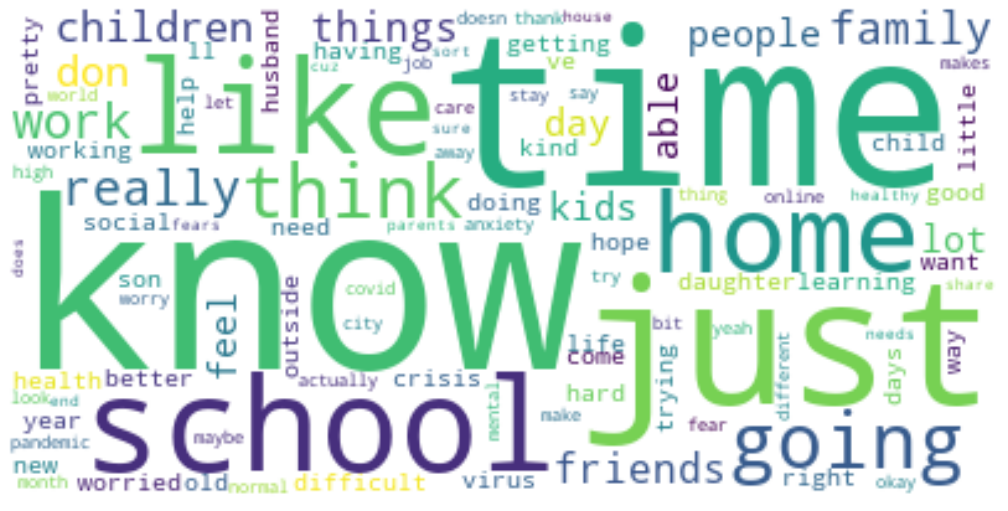

In [43]:
plt.figure(figsize=(16, 10), dpi=80)
plt.imshow(tfidf_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment analysis using pre-trained models

### Using NLTK Vader Model

In [44]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...


In [45]:
sid = SentimentIntensityAnalyzer()


In [54]:
sentiment_scores = [sid.polarity_scores(transcript) for transcript in logger_data['transcriptions']]
sentiment_scores


[{'neg': 0.081, 'neu': 0.753, 'pos': 0.166, 'compound': 0.9659},
 {'neg': 0.085, 'neu': 0.851, 'pos': 0.064, 'compound': -0.9046},
 {'neg': 0.07, 'neu': 0.843, 'pos': 0.087, 'compound': 0.6421},
 {'neg': 0.114, 'neu': 0.799, 'pos': 0.087, 'compound': -0.4742},
 {'neg': 0.088, 'neu': 0.778, 'pos': 0.135, 'compound': 0.903},
 {'neg': 0.091, 'neu': 0.815, 'pos': 0.094, 'compound': 0.3554},
 {'neg': 0.156, 'neu': 0.676, 'pos': 0.169, 'compound': 0.1531},
 {'neg': 0.127, 'neu': 0.767, 'pos': 0.106, 'compound': -0.2023},
 {'neg': 0.177, 'neu': 0.642, 'pos': 0.181, 'compound': 0.4275},
 {'neg': 0.08, 'neu': 0.771, 'pos': 0.149, 'compound': 0.9325},
 {'neg': 0.104, 'neu': 0.696, 'pos': 0.2, 'compound': 0.6298},
 {'neg': 0.226, 'neu': 0.709, 'pos': 0.065, 'compound': -0.9589},
 {'neg': 0.132, 'neu': 0.708, 'pos': 0.16, 'compound': -0.1027},
 {'neg': 0.278, 'neu': 0.518, 'pos': 0.204, 'compound': -0.0772},
 {'neg': 0.066, 'neu': 0.752, 'pos': 0.182, 'compound': 0.8627},
 {'neg': 0.074, 'neu': 0.

In [56]:
sentiment_df = pd.DataFrame.from_records(sentiment_scores, index=logger_data.index)

In [103]:
sentiment_df['sentiment_class'] = sentiment_df[['neg','pos','neu']].idxmax(axis=1)

In [107]:
px.bar(sentiment_df['sentiment_class'].value_counts(normalize=True)) 

#### Note
Any other models can be also utilize for similar purpose